# Part 1: Introducing MNIST

In [ ]:
# Execute this code block to install dependencies when running on colab
try:
    import torch
except:
    from os.path import exists
    from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
    platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
    cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
    accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

    !pip install -q http://download.pytorch.org/whl/{accelerator}/torch-1.0.0-{platform}-linux_x86_64.whl torchvision

try: 
    import torchbearer
except:
    !pip install torchbearer
    !pip install livelossplot


In [ ]:
import torch
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch import nn
from torch import optim
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt


In [ ]:
# fix random seed for reproducibility
seed = 7
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
import numpy as np
np.random.seed(seed)

#flatten 28*28 images to a 784 vector for each image
transform = transforms.Compose([
    transforms.ToTensor(),  # convert to tensor
    transforms.Lambda(lambda x: x.view(-1))  # flatten into vector
])


In [ ]:
def loadData(batch_size: int=128):
    trainset = MNIST(".", train=True, download=True, transform=transform)
    testset = MNIST(".", train=False, download=True, transform=transform)
    trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)
    testloader = DataLoader(testset, batch_size=batch_size, shuffle=True)
    return trainloader, testloader


In [ ]:
class BaselineModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(BaselineModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = F.relu(out)
        out = self.fc2(out)
        if not self.training:
            out = F.softmax(out, dim=1)
        return out


In [ ]:
from torchbearer.callbacks import LiveLossPlot

def trainMLP2(model, train_data, test_data):
    # define the loss function and the optimiser
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    loss_function = nn.CrossEntropyLoss()
    optimiser = optim.Adam(model.parameters())

    #%matplotlib inline
    callbacks = [LiveLossPlot()]
    
    # Construct a trial object with the model, optimiser and loss.
    # Also specify metrics we wish to compute.
    trial = torchbearer.Trial(model, optimiser, loss_function, metrics=['loss', 'accuracy'], callbacks=callbacks).to(device)

    # Provide the data to the trial
    trial.with_generators(train_generator=train_data,  val_generator=test_data,test_generator=test_data)

    # Run 10 epochs of training
    history = trial.run(epochs=10, verbose=0)
    
    return history, trial

In [ ]:
def eval(history, trial):
    results = trial.evaluate(data_key=torchbearer.TEST_DATA)
    print("HISTORY:")
    print(history)
    print("RESULTS:")
    print(results)
    return

In [ ]:
def question1(hidden_length: int = 10):
    train, test = loadData()
    model = BaselineModel(784, hidden_length, 10)
    return trainMLP2(model, train, test)

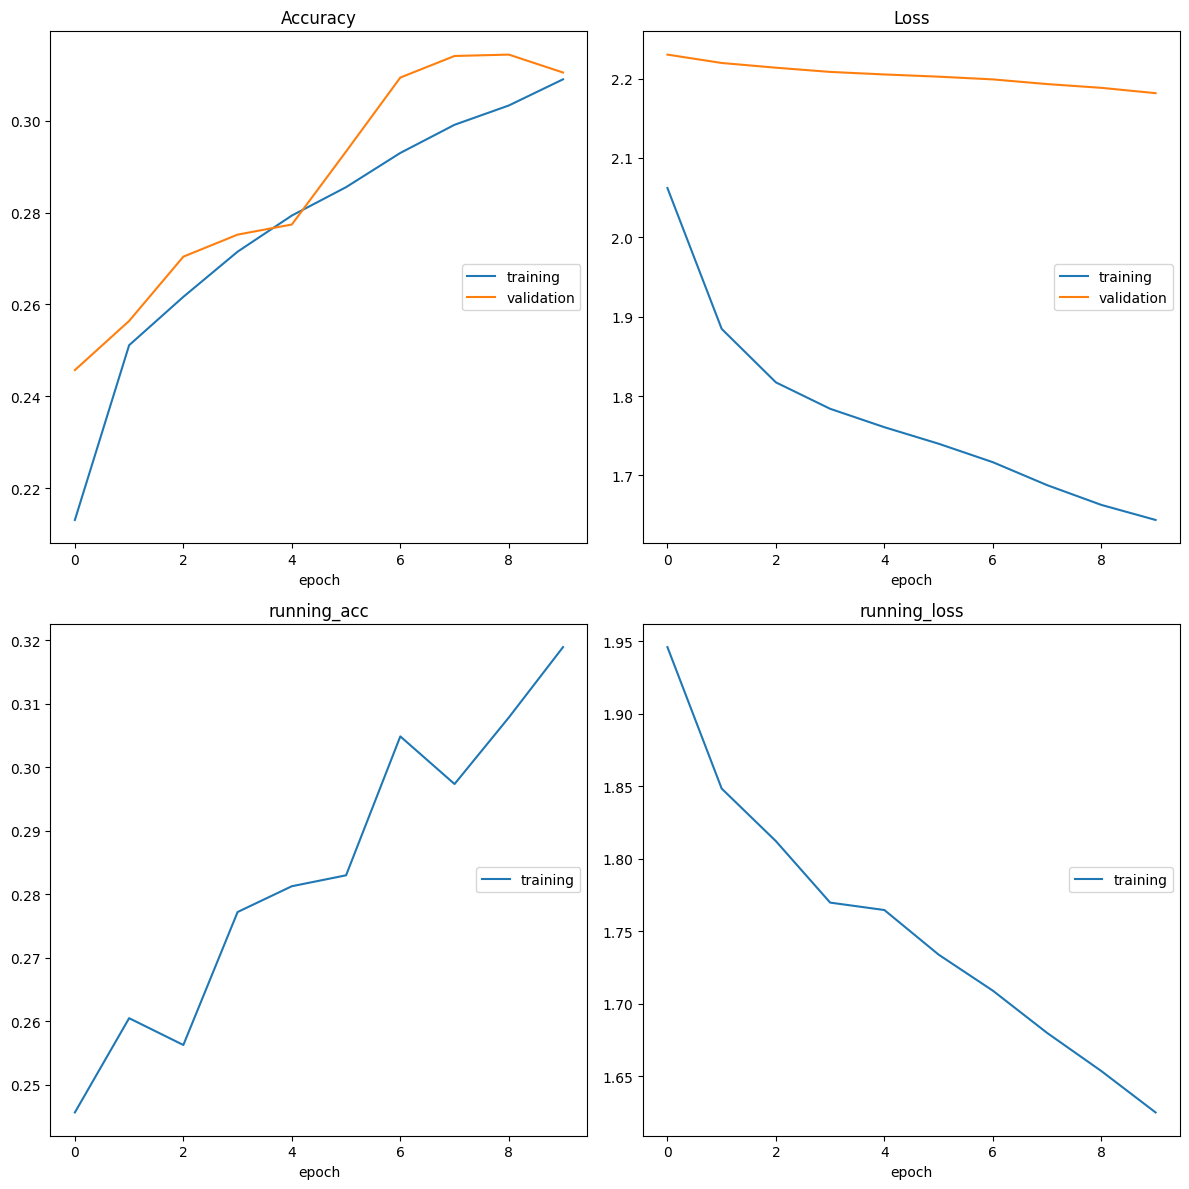

In [ ]:
history, trial = question1(1)

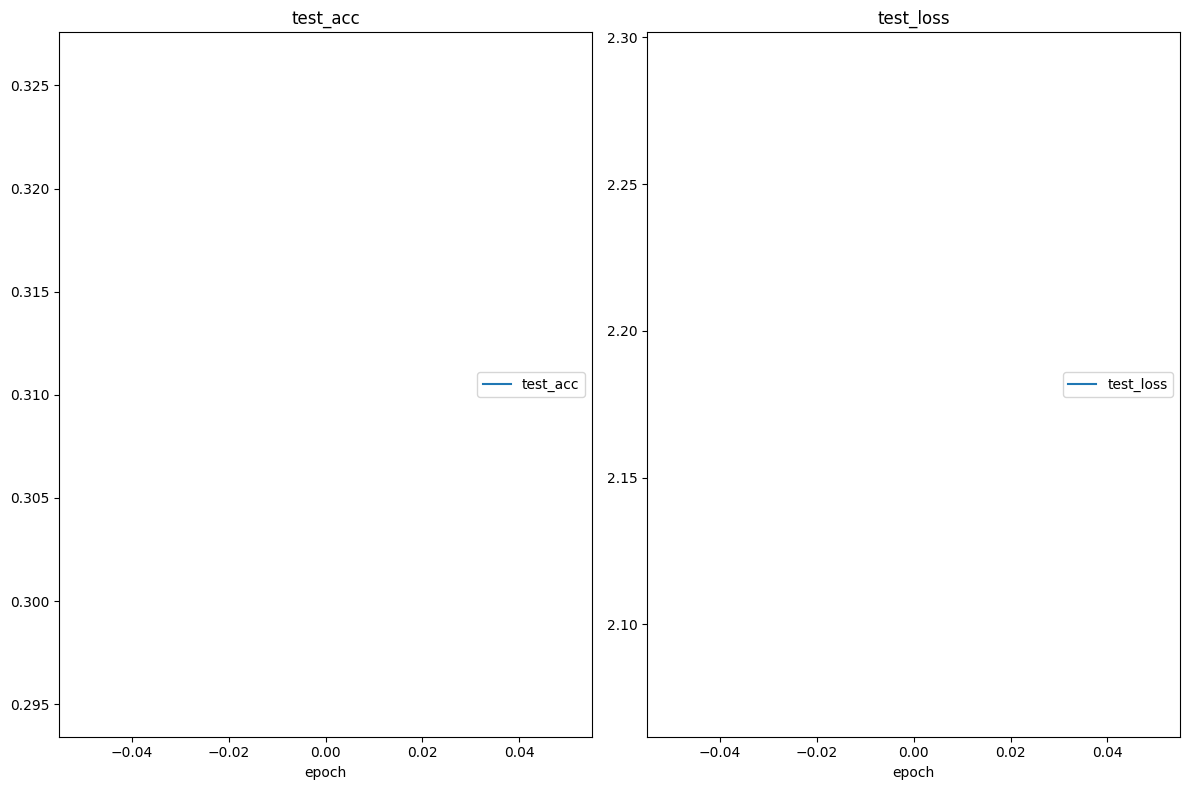

HISTORY:
[{'running_loss': 1.9459041357040405, 'running_acc': 0.24562498927116394, 'loss': 2.0620312690734863, 'acc': 0.21306666731834412, 'val_loss': 2.2301089763641357, 'val_acc': 0.24569998681545258, 'train_steps': 469, 'validation_steps': 79}, {'running_loss': 1.8482974767684937, 'running_acc': 0.2604687511920929, 'loss': 1.8846321105957031, 'acc': 0.25111666321754456, 'val_loss': 2.2195606231689453, 'val_acc': 0.2563999891281128, 'train_steps': 469, 'validation_steps': 79}, {'running_loss': 1.8120263814926147, 'running_acc': 0.2562499940395355, 'loss': 1.8172338008880615, 'acc': 0.2616499960422516, 'val_loss': 2.213606119155884, 'val_acc': 0.2703999876976013, 'train_steps': 469, 'validation_steps': 79}, {'running_loss': 1.769641637802124, 'running_acc': 0.2771874964237213, 'loss': 1.7839733362197876, 'acc': 0.27148333191871643, 'val_loss': 2.2083041667938232, 'val_acc': 0.2751999795436859, 'train_steps': 469, 'validation_steps': 79}, {'running_loss': 1.7645106315612793, 'running_a

In [ ]:
eval(history, trial)

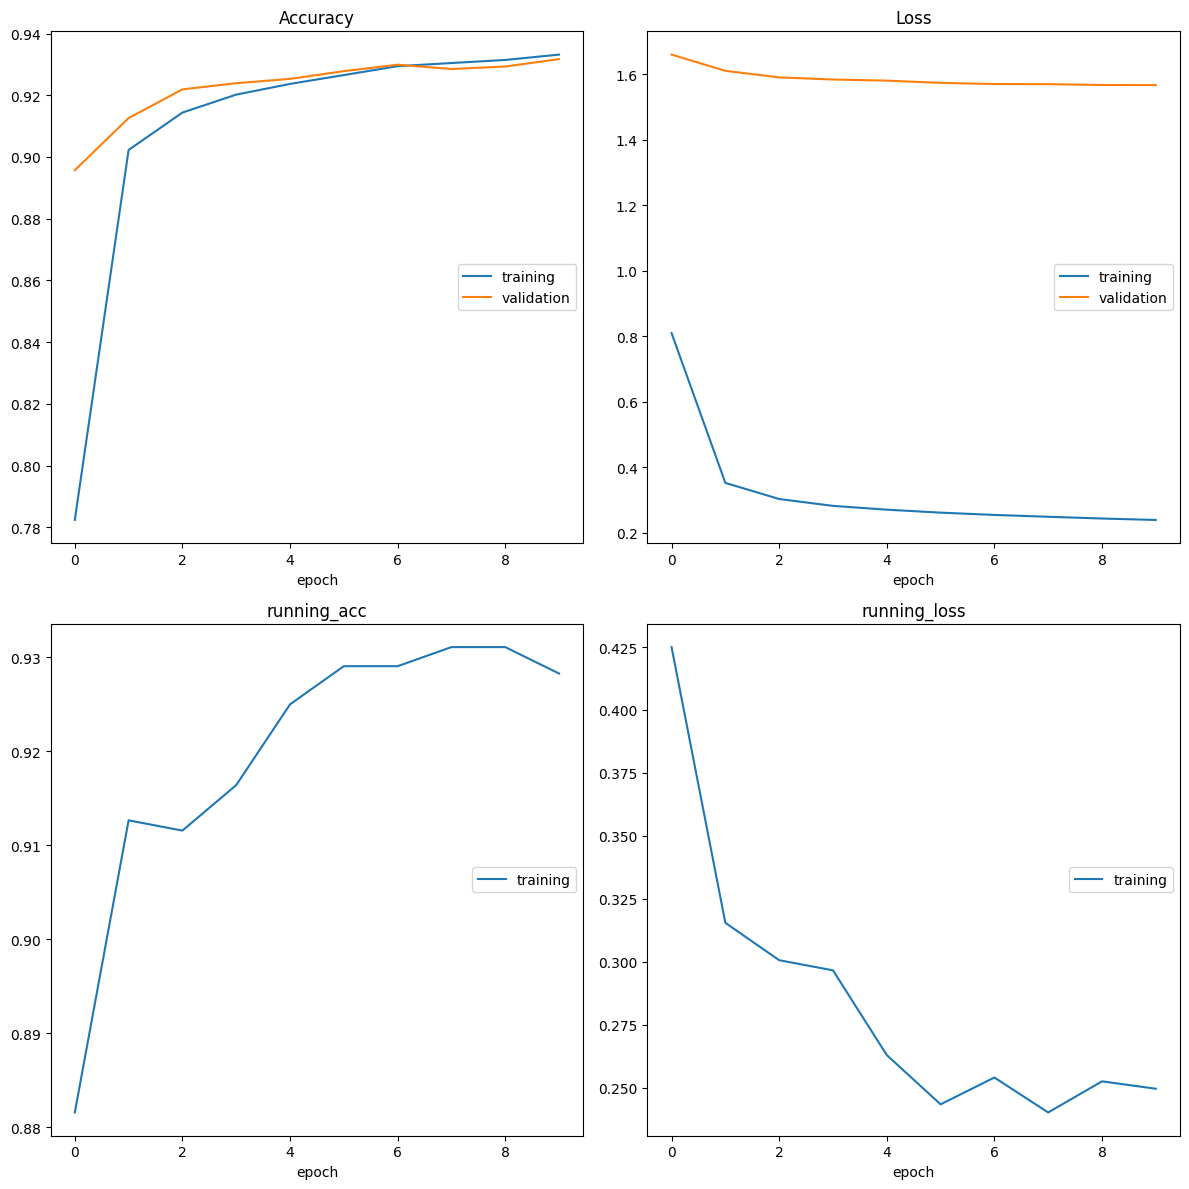

In [ ]:
history, trial = question1(10)

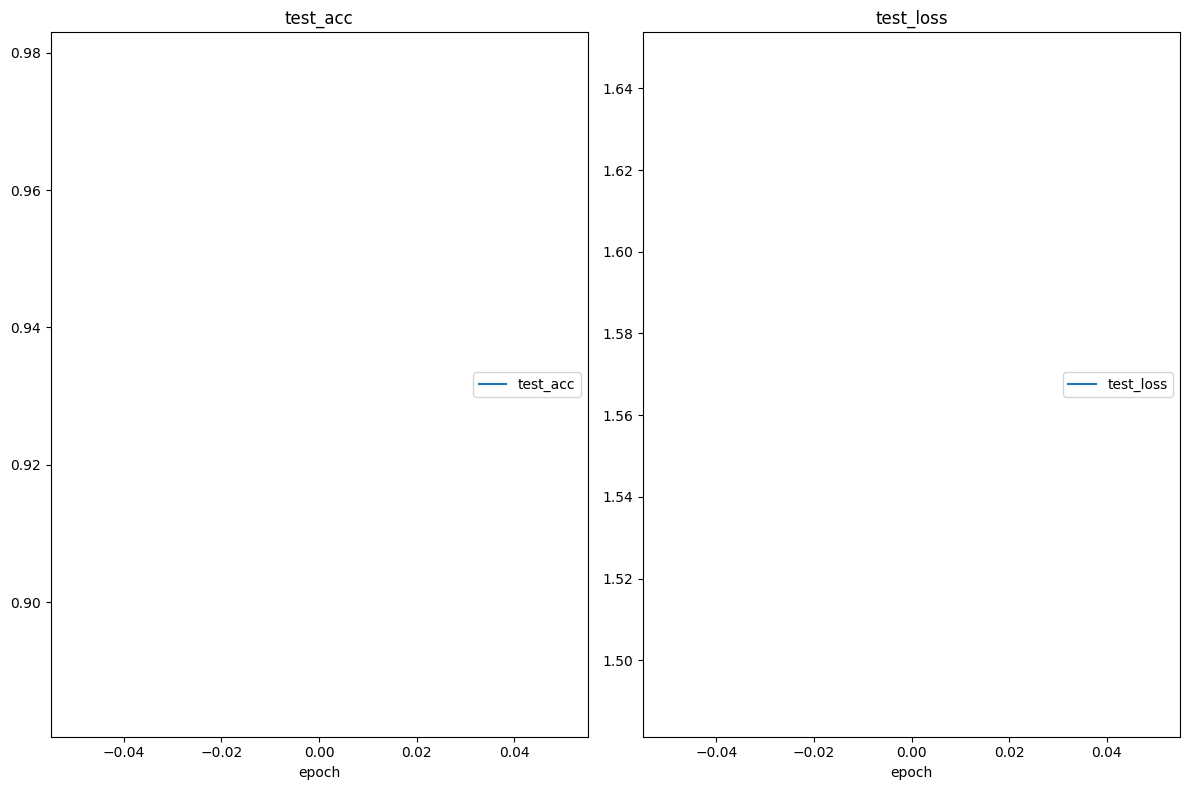

HISTORY:
[{'running_loss': 0.4249848425388336, 'running_acc': 0.8815624713897705, 'loss': 0.8098078966140747, 'acc': 0.7823666930198669, 'val_loss': 1.659792423248291, 'val_acc': 0.8956999778747559, 'train_steps': 469, 'validation_steps': 79}, {'running_loss': 0.3154347240924835, 'running_acc': 0.9126562476158142, 'loss': 0.352573037147522, 'acc': 0.9022666811943054, 'val_loss': 1.61024010181427, 'val_acc': 0.9125999808311462, 'train_steps': 469, 'validation_steps': 79}, {'running_loss': 0.30058860778808594, 'running_acc': 0.9115625023841858, 'loss': 0.3033621311187744, 'acc': 0.9143833518028259, 'val_loss': 1.5902577638626099, 'val_acc': 0.9218999743461609, 'train_steps': 469, 'validation_steps': 79}, {'running_loss': 0.2965678870677948, 'running_acc': 0.9164062142372131, 'loss': 0.28243115544319153, 'acc': 0.920199990272522, 'val_loss': 1.5837616920471191, 'val_acc': 0.9238999485969543, 'train_steps': 469, 'validation_steps': 79}, {'running_loss': 0.26290401816368103, 'running_acc': 

In [ ]:
eval(history, trial)

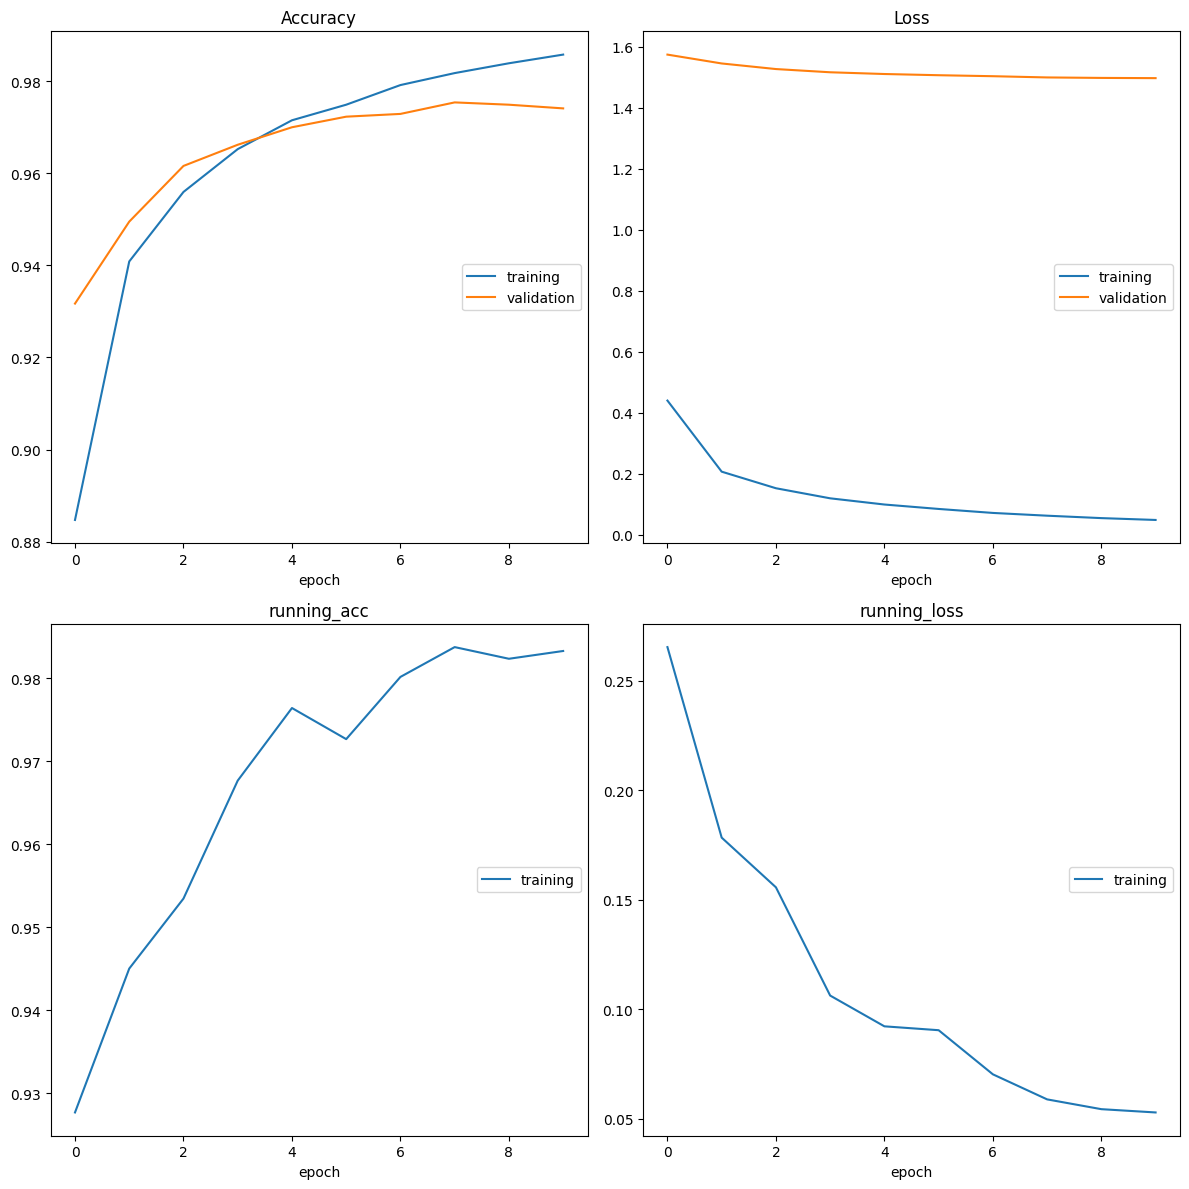

In [ ]:
history, trial = question1(100)

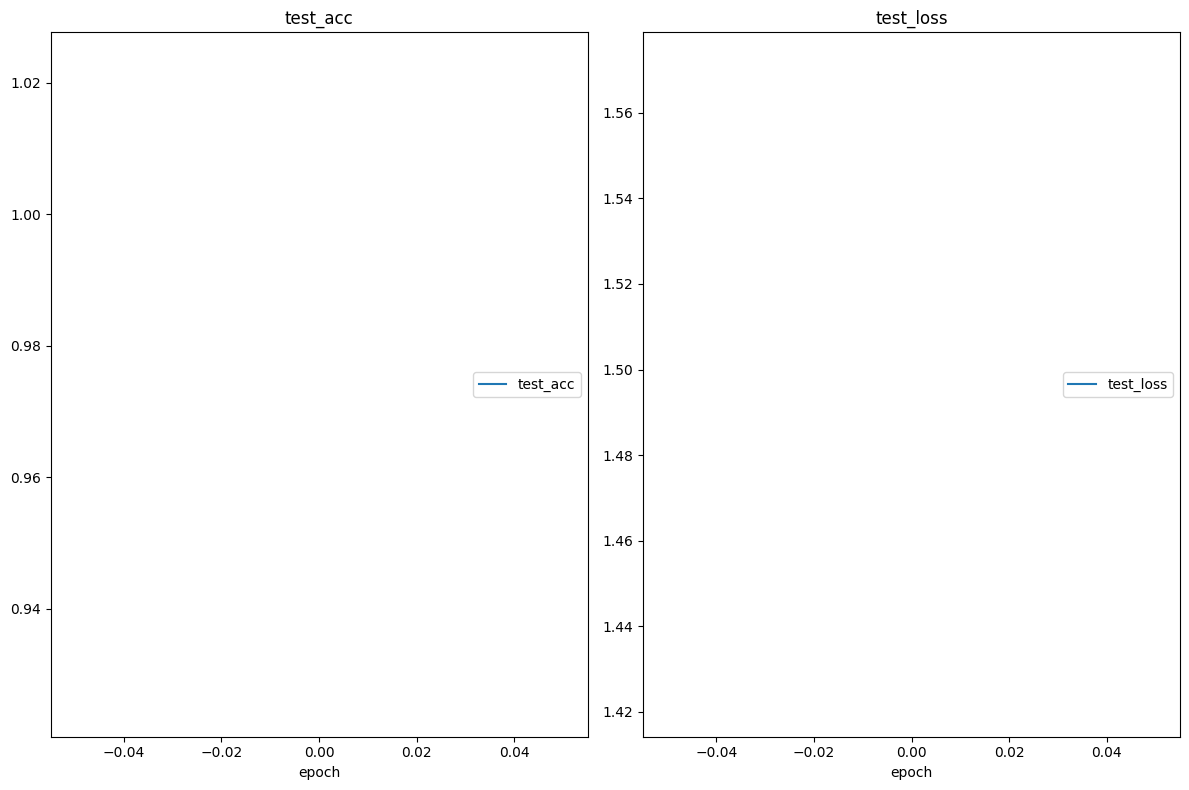

HISTORY:
[{'running_loss': 0.2653951048851013, 'running_acc': 0.9276562333106995, 'loss': 0.43998199701309204, 'acc': 0.8847000002861023, 'val_loss': 1.5734950304031372, 'val_acc': 0.9316999912261963, 'train_steps': 469, 'validation_steps': 79}, {'running_loss': 0.17839185893535614, 'running_acc': 0.9449999928474426, 'loss': 0.20704807341098785, 'acc': 0.940850019454956, 'val_loss': 1.5444543361663818, 'val_acc': 0.9494999647140503, 'train_steps': 469, 'validation_steps': 79}, {'running_loss': 0.15570442378520966, 'running_acc': 0.9534375071525574, 'loss': 0.15274642407894135, 'acc': 0.9559500217437744, 'val_loss': 1.5261417627334595, 'val_acc': 0.9615999460220337, 'train_steps': 469, 'validation_steps': 79}, {'running_loss': 0.10627170652151108, 'running_acc': 0.9676562547683716, 'loss': 0.11974211037158966, 'acc': 0.9652500152587891, 'val_loss': 1.5155898332595825, 'val_acc': 0.9661999940872192, 'train_steps': 469, 'validation_steps': 79}, {'running_loss': 0.09222133457660675, 'runni

In [ ]:
eval(history, trial)

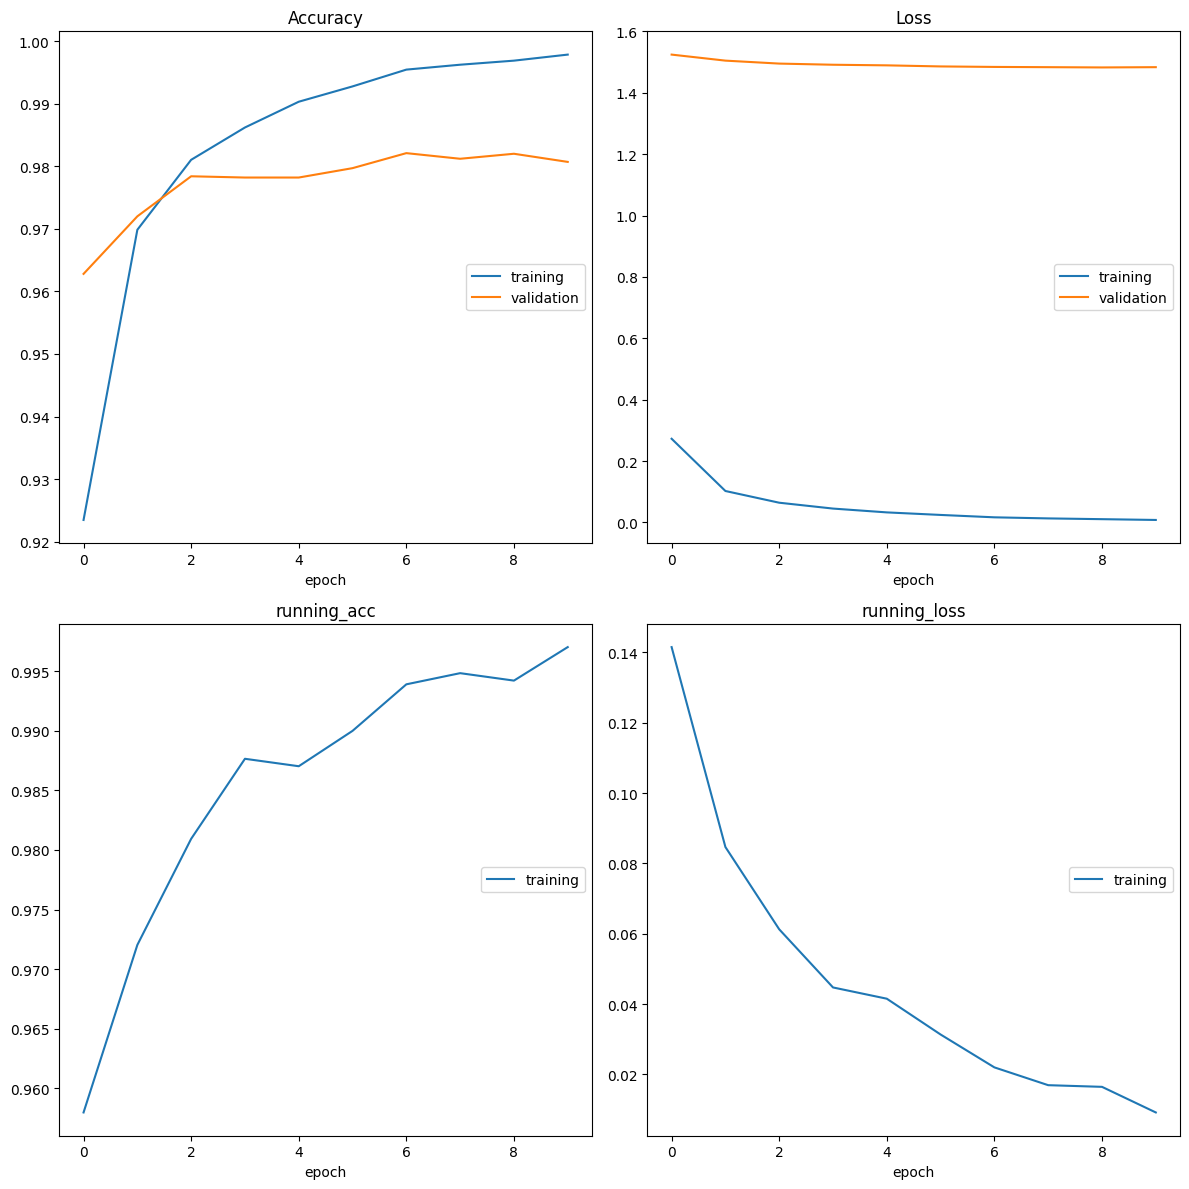

In [ ]:
history, trial = question1(1000)

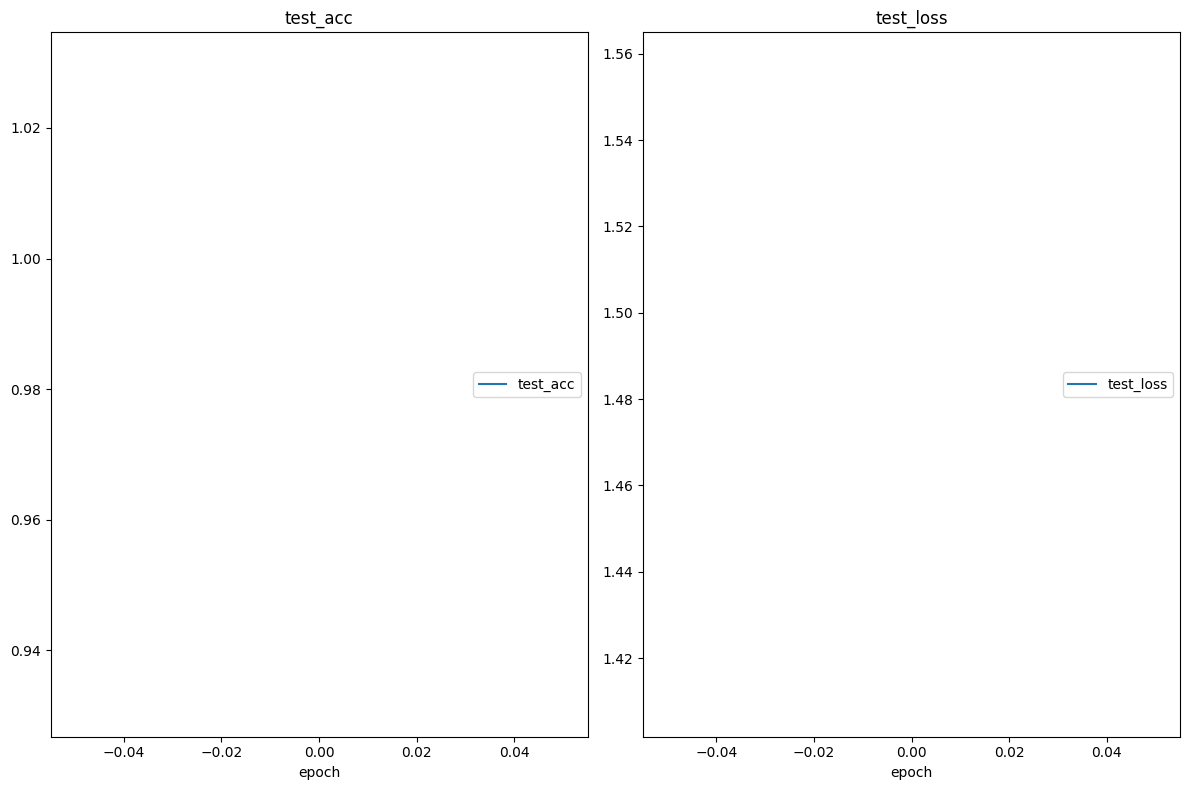

HISTORY:
[{'running_loss': 0.14153073728084564, 'running_acc': 0.9579687118530273, 'loss': 0.2727113366127014, 'acc': 0.923466682434082, 'val_loss': 1.5243685245513916, 'val_acc': 0.9627999663352966, 'train_steps': 469, 'validation_steps': 79}, {'running_loss': 0.08466115593910217, 'running_acc': 0.9720312356948853, 'loss': 0.10250458866357803, 'acc': 0.9698500037193298, 'val_loss': 1.5047158002853394, 'val_acc': 0.972000002861023, 'train_steps': 469, 'validation_steps': 79}, {'running_loss': 0.06126360222697258, 'running_acc': 0.9809374809265137, 'loss': 0.06433562934398651, 'acc': 0.9810333251953125, 'val_loss': 1.4950872659683228, 'val_acc': 0.9783999919891357, 'train_steps': 469, 'validation_steps': 79}, {'running_loss': 0.044726260006427765, 'running_acc': 0.9876562356948853, 'loss': 0.045243095606565475, 'acc': 0.9862000346183777, 'val_loss': 1.491324782371521, 'val_acc': 0.9781999588012695, 'train_steps': 469, 'validation_steps': 79}, {'running_loss': 0.041524939239025116, 'runn

In [ ]:
eval(history, trial)

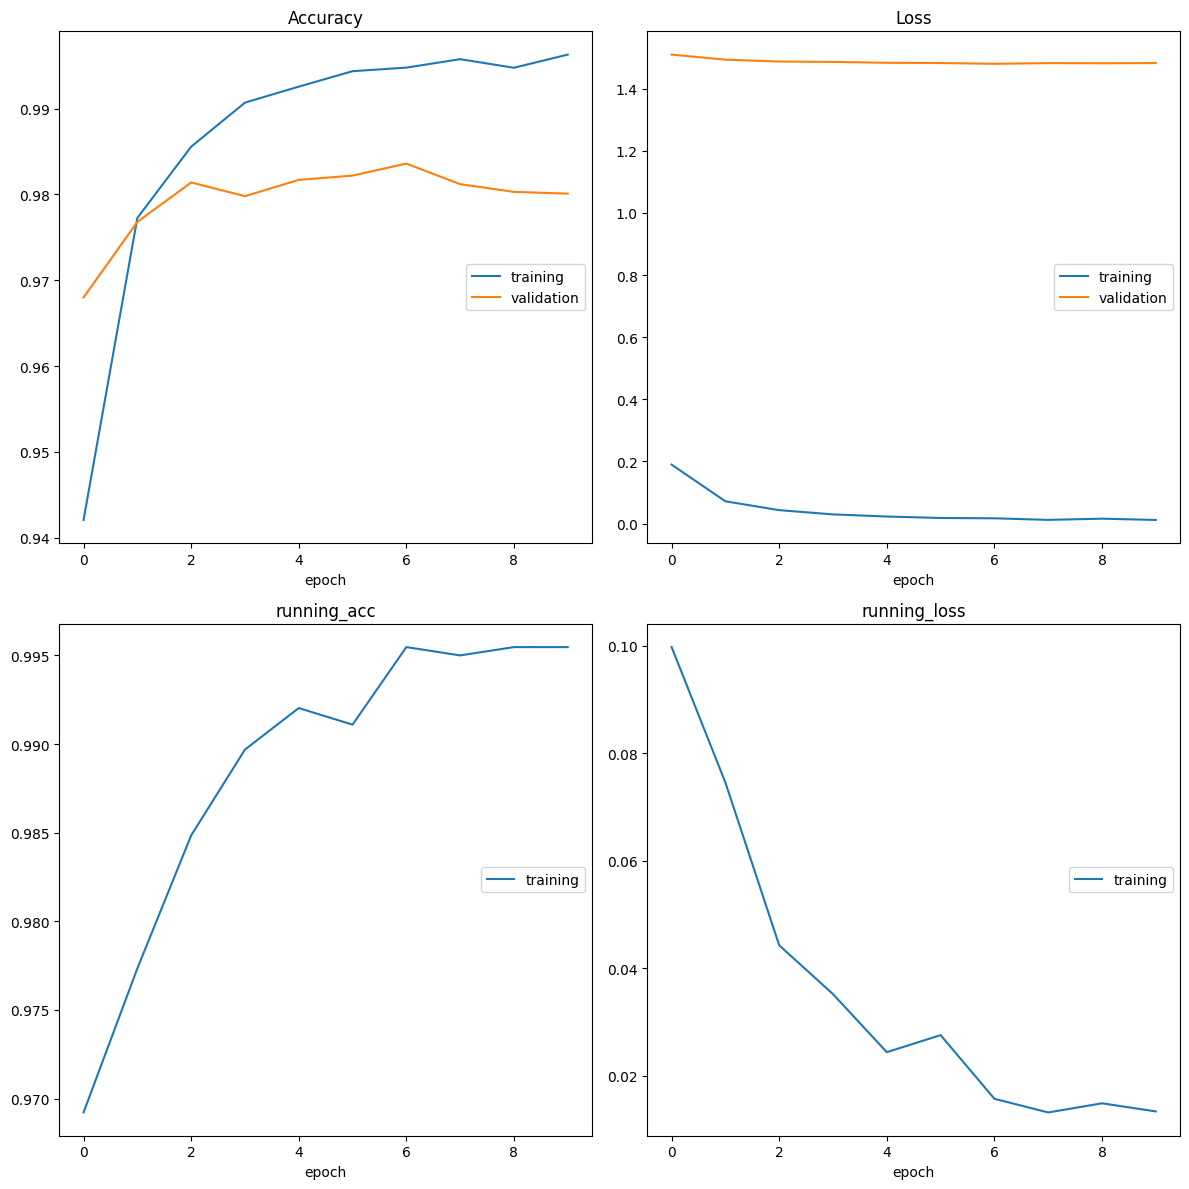

In [ ]:
history, trial = question1(10000)

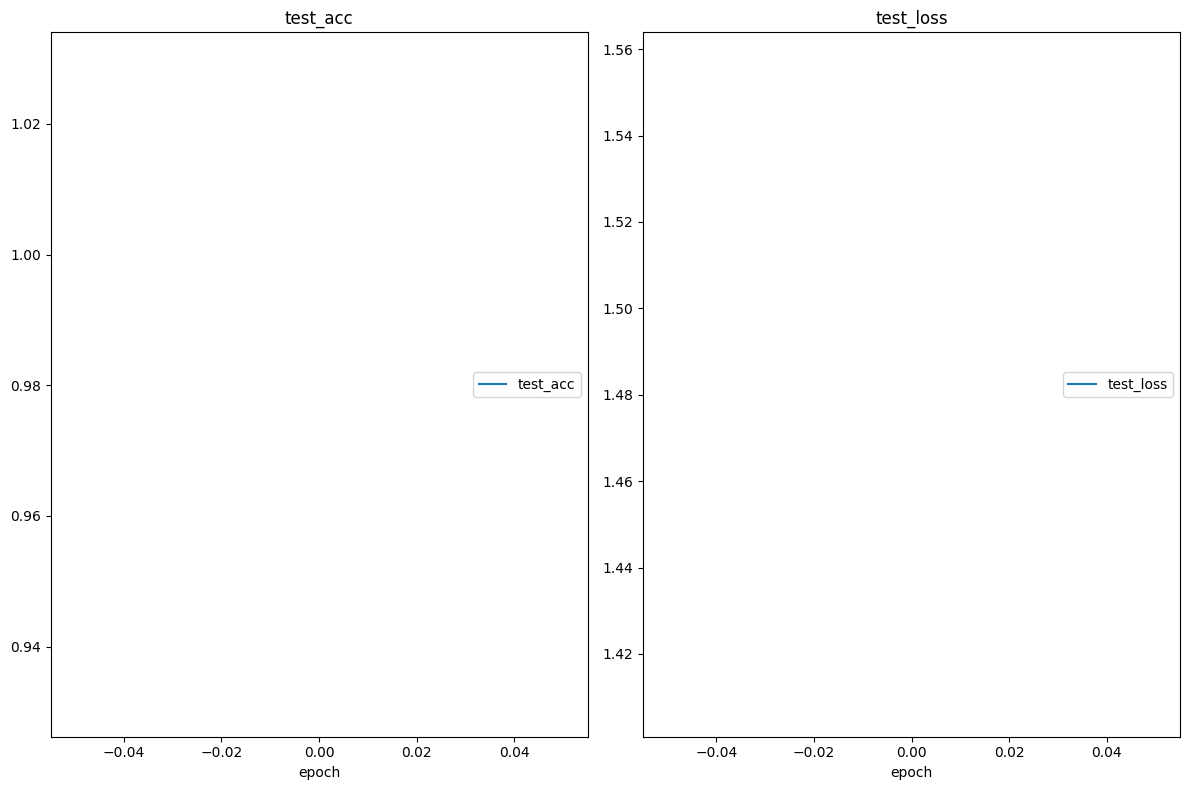

HISTORY:
[{'running_loss': 0.09971077740192413, 'running_acc': 0.9692187309265137, 'loss': 0.18973785638809204, 'acc': 0.9420666694641113, 'val_loss': 1.5095311403274536, 'val_acc': 0.9679999947547913, 'train_steps': 469, 'validation_steps': 79}, {'running_loss': 0.0745023638010025, 'running_acc': 0.977343738079071, 'loss': 0.07167226076126099, 'acc': 0.9772666692733765, 'val_loss': 1.493238091468811, 'val_acc': 0.9767999649047852, 'train_steps': 469, 'validation_steps': 79}, {'running_loss': 0.04423478990793228, 'running_acc': 0.9848437309265137, 'loss': 0.04319681599736214, 'acc': 0.9855666756629944, 'val_loss': 1.4872102737426758, 'val_acc': 0.9813999533653259, 'train_steps': 469, 'validation_steps': 79}, {'running_loss': 0.035149019211530685, 'running_acc': 0.9896875023841858, 'loss': 0.029553459957242012, 'acc': 0.9907000064849854, 'val_loss': 1.4860520362854004, 'val_acc': 0.9797999858856201, 'train_steps': 469, 'validation_steps': 79}, {'running_loss': 0.02434917725622654, 'runn

In [ ]:
eval(history, trial)

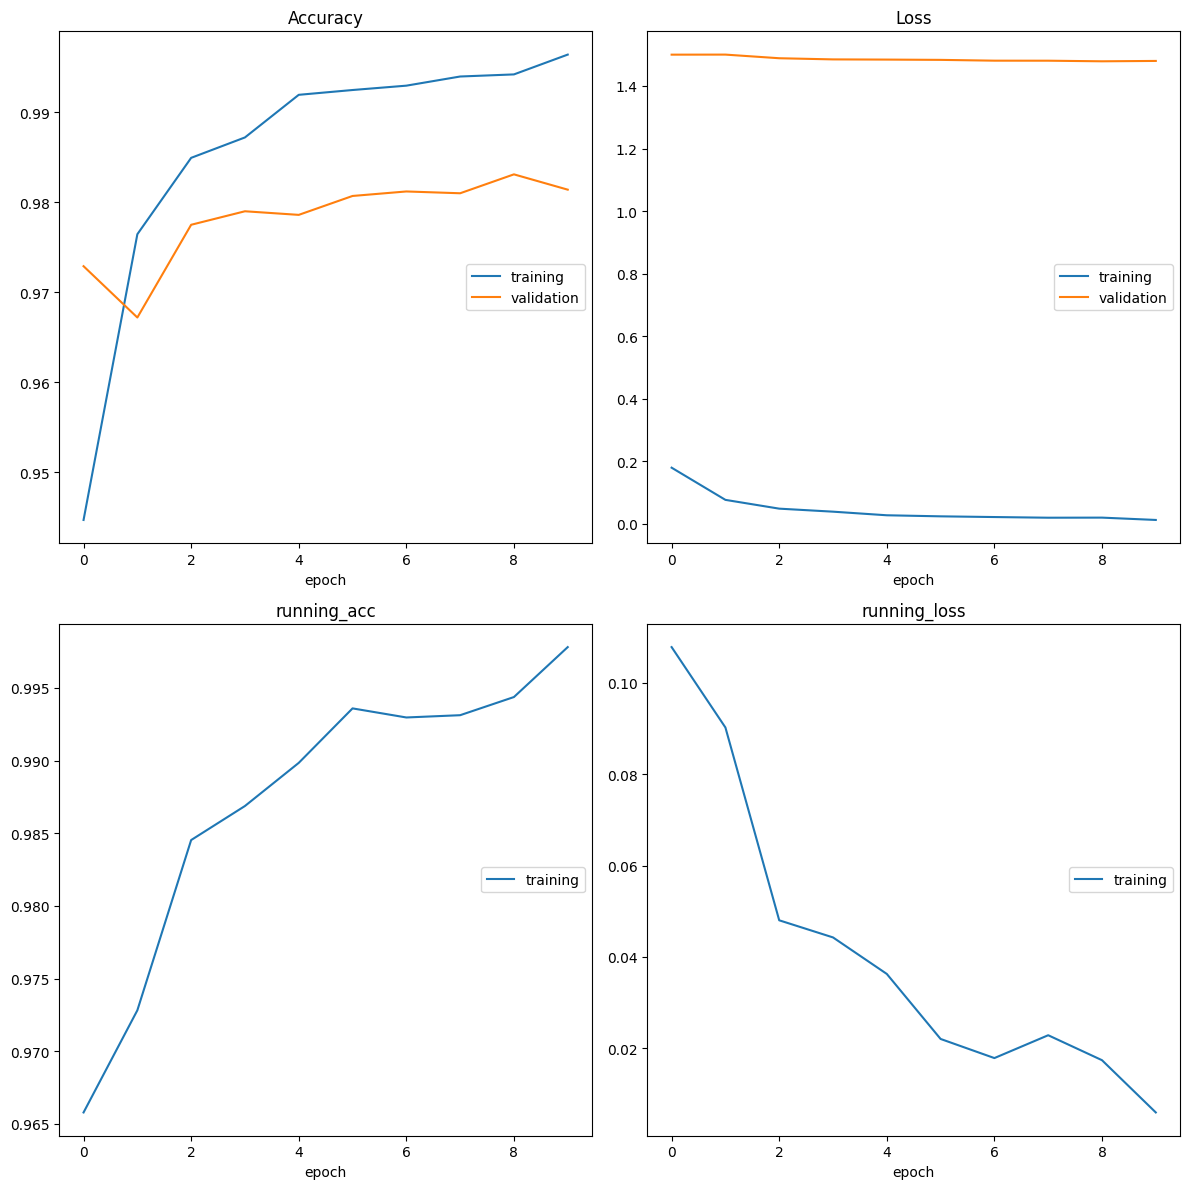

In [ ]:
history, trial = question1(50000)

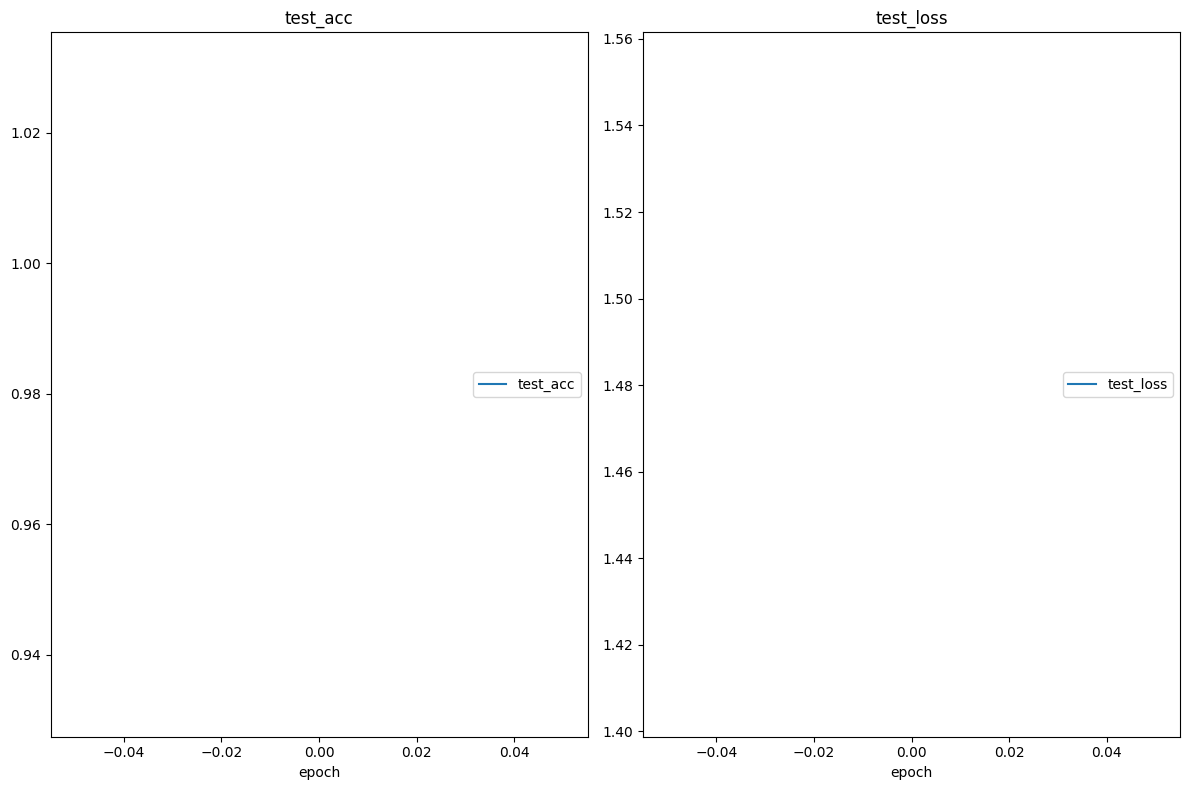

HISTORY:
[{'running_loss': 0.10784832388162613, 'running_acc': 0.9657812118530273, 'loss': 0.1791955530643463, 'acc': 0.9447166919708252, 'val_loss': 1.5001856088638306, 'val_acc': 0.9728999733924866, 'train_steps': 469, 'validation_steps': 79}, {'running_loss': 0.09024293720722198, 'running_acc': 0.9728124737739563, 'loss': 0.07627573609352112, 'acc': 0.9764500260353088, 'val_loss': 1.5003654956817627, 'val_acc': 0.967199981212616, 'train_steps': 469, 'validation_steps': 79}, {'running_loss': 0.048017386347055435, 'running_acc': 0.9845312237739563, 'loss': 0.0481819212436676, 'acc': 0.9849333167076111, 'val_loss': 1.4887254238128662, 'val_acc': 0.9774999618530273, 'train_steps': 469, 'validation_steps': 79}, {'running_loss': 0.04426748678088188, 'running_acc': 0.9868749976158142, 'loss': 0.03852767124772072, 'acc': 0.9872000217437744, 'val_loss': 1.4850213527679443, 'val_acc': 0.9789999723434448, 'train_steps': 469, 'validation_steps': 79}, {'running_loss': 0.03627041354775429, 'runni

In [ ]:
eval(history, trial)

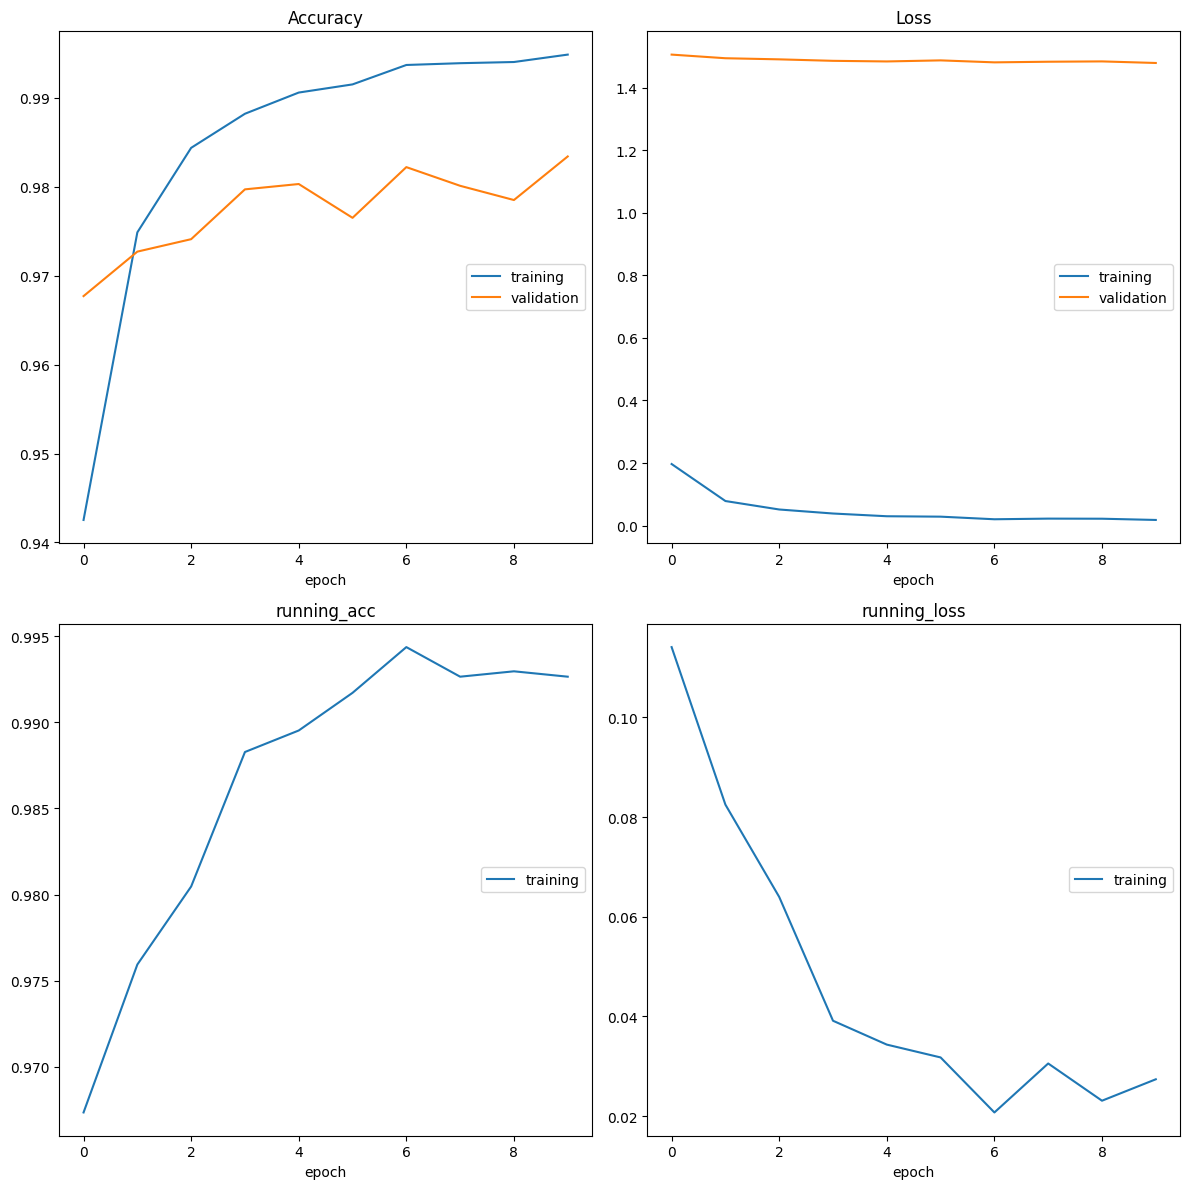

In [ ]:
history, trial = question1(100000)

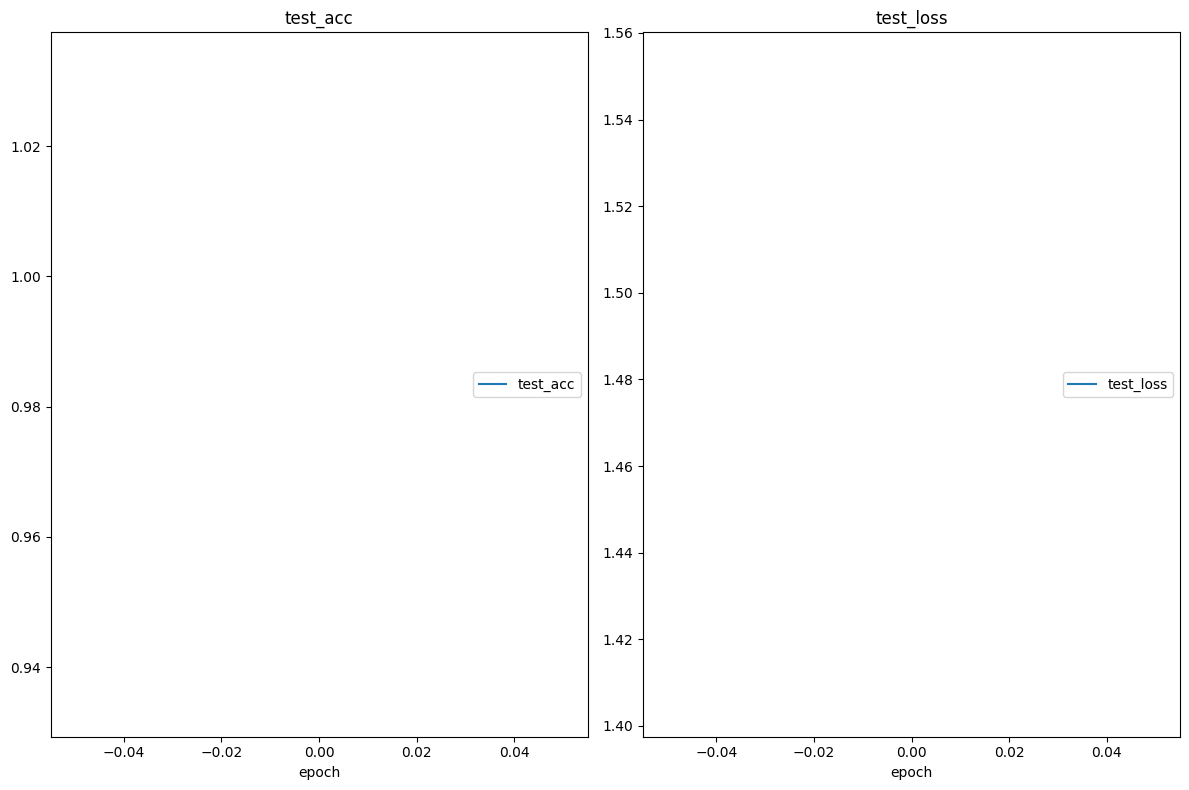

HISTORY:
[{'running_loss': 0.11411446332931519, 'running_acc': 0.9673437476158142, 'loss': 0.19682817161083221, 'acc': 0.9425333142280579, 'val_loss': 1.5055286884307861, 'val_acc': 0.9677000045776367, 'train_steps': 469, 'validation_steps': 79}, {'running_loss': 0.0825042575597763, 'running_acc': 0.9759374856948853, 'loss': 0.07853620499372482, 'acc': 0.9748666882514954, 'val_loss': 1.4939026832580566, 'val_acc': 0.9726999998092651, 'train_steps': 469, 'validation_steps': 79}, {'running_loss': 0.06398390233516693, 'running_acc': 0.98046875, 'loss': 0.05149872973561287, 'acc': 0.9843666553497314, 'val_loss': 1.4903494119644165, 'val_acc': 0.9740999937057495, 'train_steps': 469, 'validation_steps': 79}, {'running_loss': 0.03914320468902588, 'running_acc': 0.98828125, 'loss': 0.038651879876852036, 'acc': 0.9882000088691711, 'val_loss': 1.4856253862380981, 'val_acc': 0.979699969291687, 'train_steps': 469, 'validation_steps': 79}, {'running_loss': 0.03435785323381424, 'running_acc': 0.9895

In [ ]:
eval(history, trial)

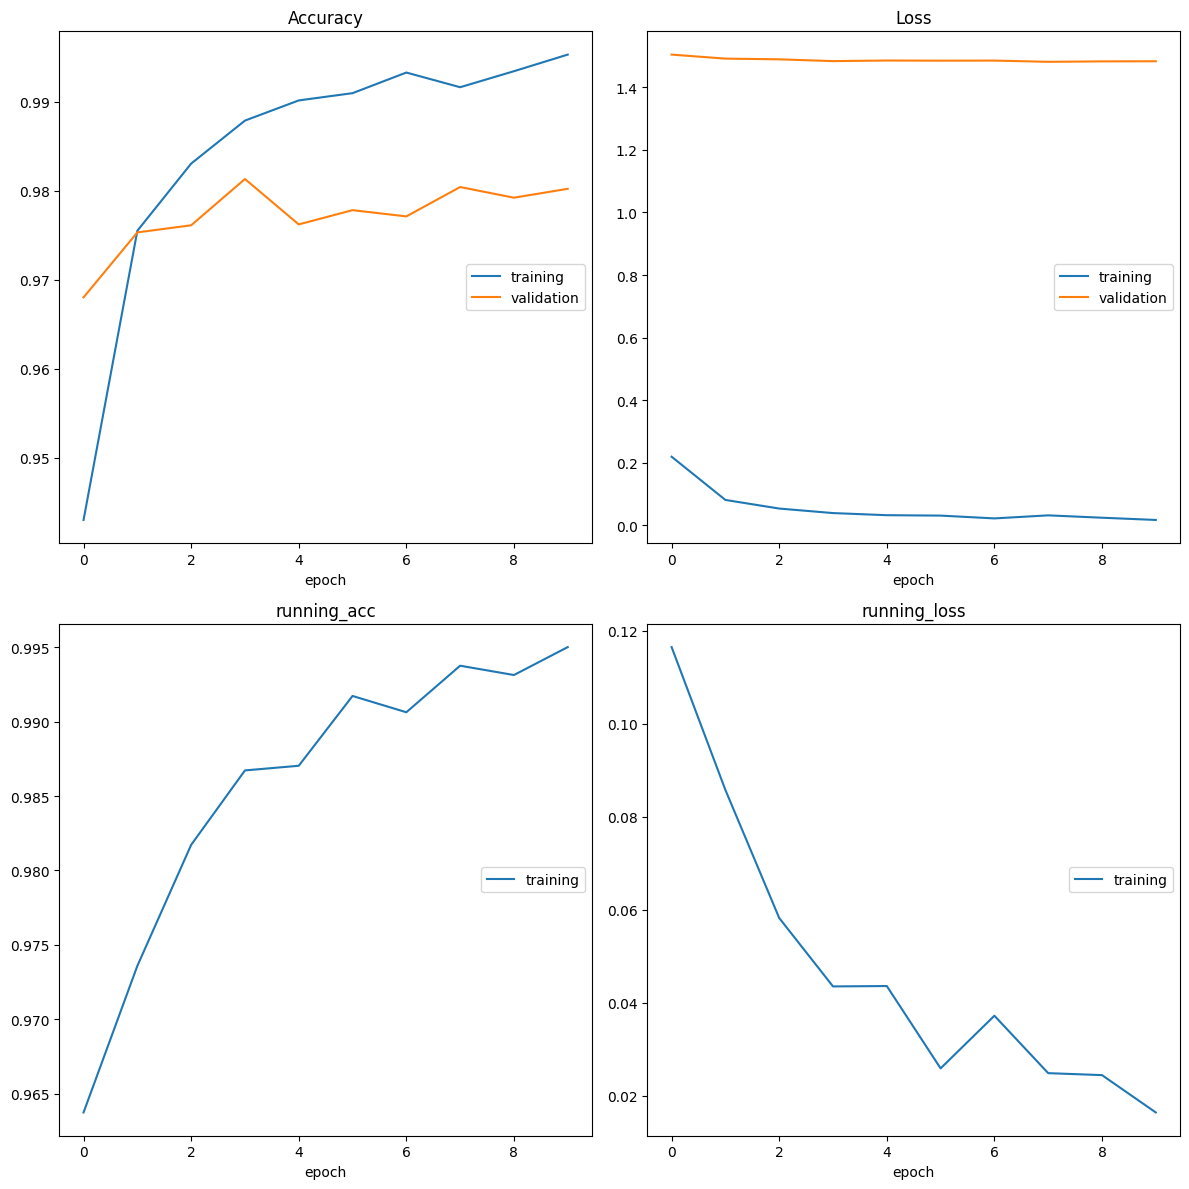

In [ ]:
history, trial = question1(150000)

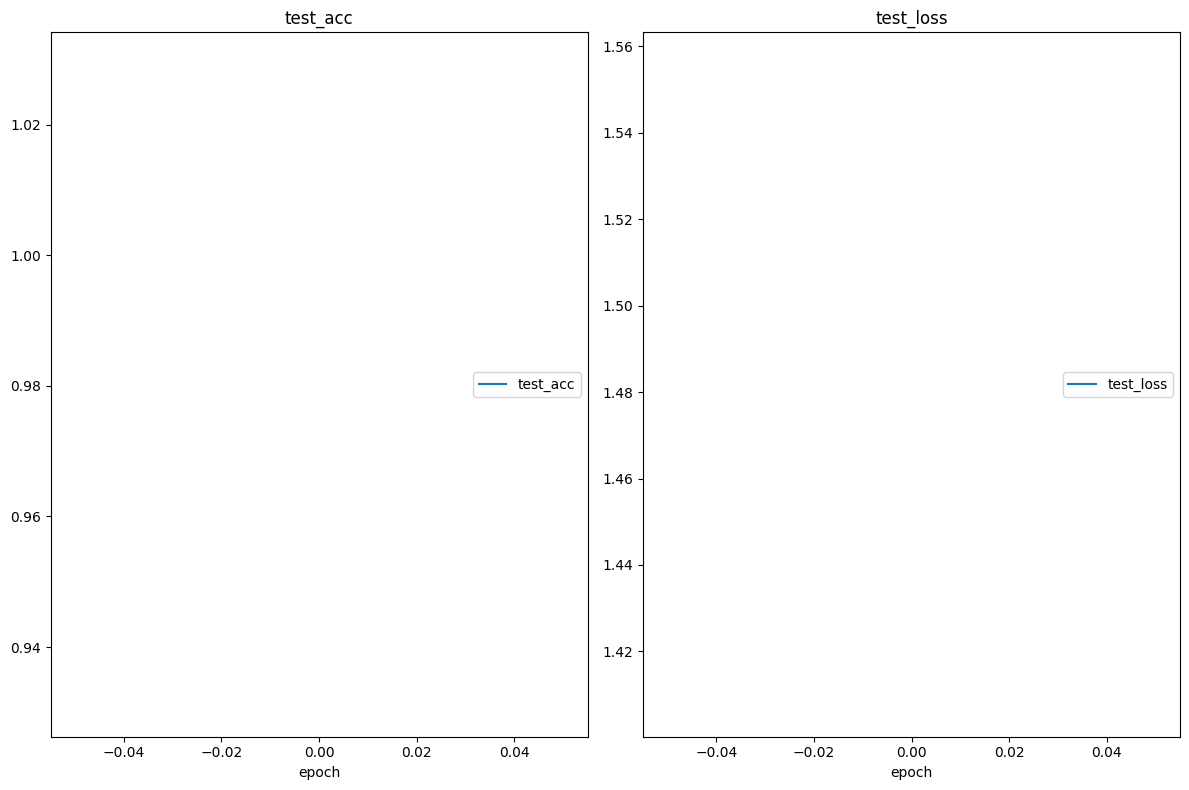

HISTORY:
[{'running_loss': 0.11651115119457245, 'running_acc': 0.9637500047683716, 'loss': 0.2195512056350708, 'acc': 0.9429833292961121, 'val_loss': 1.5044946670532227, 'val_acc': 0.9679999947547913, 'train_steps': 469, 'validation_steps': 79}, {'running_loss': 0.08577170968055725, 'running_acc': 0.9735937118530273, 'loss': 0.08137095719575882, 'acc': 0.9754833579063416, 'val_loss': 1.491654396057129, 'val_acc': 0.9752999544143677, 'train_steps': 469, 'validation_steps': 79}, {'running_loss': 0.0582294687628746, 'running_acc': 0.9817187190055847, 'loss': 0.053887732326984406, 'acc': 0.9830333590507507, 'val_loss': 1.4893686771392822, 'val_acc': 0.976099967956543, 'train_steps': 469, 'validation_steps': 79}, {'running_loss': 0.04351251199841499, 'running_acc': 0.9867187142372131, 'loss': 0.03941889852285385, 'acc': 0.9878666996955872, 'val_loss': 1.4836761951446533, 'val_acc': 0.9812999963760376, 'train_steps': 469, 'validation_steps': 79}, {'running_loss': 0.04359361529350281, 'runnin

In [ ]:
eval(history, trial)